In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfa-tree-segmentation/IMG_20210603_081229.jpg
/kaggle/input/pfa-tree-segmentation/im2.jpg
/kaggle/input/pfa-tree-segmentation/im7.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_091003.jpg
/kaggle/input/pfa-tree-segmentation/ann_tout_Tree.json
/kaggle/input/pfa-tree-segmentation/md1.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_083105.jpg
/kaggle/input/pfa-tree-segmentation/O1.jpg
/kaggle/input/pfa-tree-segmentation/O_131625.jpg
/kaggle/input/pfa-tree-segmentation/O_124141.jpg
/kaggle/input/pfa-tree-segmentation/O_124601.jpg
/kaggle/input/pfa-tree-segmentation/im4.jpg
/kaggle/input/pfa-tree-segmentation/md7.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_083350.jpg
/kaggle/input/pfa-tree-segmentation/im14.jpg
/kaggle/input/pfa-tree-segmentation/O_130123.jpg
/kaggle/input/pfa-tree-segmentation/mr1.jpg
/kaggle/input/pfa-tree-segmentation/md4.jpg
/kaggle/input/pfa-tree-segmentation/md3.jpg
/kaggle/input/pfa-tree-segmentation/md8.jpg
/kaggle/input/pfa-tree-se

## TODO => faire le record video de l'annotation pour le train + val data at the same time 

## TODO  => faire les tuto pour yolov7 afin de pouvoir detecter un arbre puis faire une comparaison 

## TODO => rediger un rapport et faire un speech du projet (son importance + l'etude des courbes + la methodologie .... ) 

In [93]:
train = ["/kaggle/input/pfa-tree-segmentation/IMG_20210603_081229.jpg",
         "/kaggle/input/pfa-tree-segmentation/im2.jpg",
         "/kaggle/input/pfa-tree-segmentation/im7.jpg",
         "/kaggle/input/pfa-tree-segmentation/IMG_20210603_091003.jpg",
         "/kaggle/input/pfa-tree-segmentation/md1.jpg",
         "/kaggle/input/pfa-tree-segmentation/IMG_20210603_083105.jpg",
         "/kaggle/input/pfa-tree-segmentation/O1.jpg",
         "/kaggle/input/pfa-tree-segmentation/O_131625.jpg" ,
         "/kaggle/input/pfa-tree-segmentation/O_124141.jpg",
         "/kaggle/input/pfa-tree-segmentation/O_124601.jpg",
         "/kaggle/input/pfa-tree-segmentation/im4.jpg",
         "/kaggle/input/pfa-tree-segmentation/md7.jpg",
         "/kaggle/input/pfa-tree-segmentation/IMG_20210603_083350.jpg",
         "/kaggle/input/pfa-tree-segmentation/im14.jpg",
         "/kaggle/input/pfa-tree-segmentation/O_130123.jpg",
         "/kaggle/input/pfa-tree-segmentation/mr1.jpg",
         "/kaggle/input/pfa-tree-segmentation/md4.jpg",
         "/kaggle/input/pfa-tree-segmentation/md3.jpg",
         "/kaggle/input/pfa-tree-segmentation/md8.jpg",
         "/kaggle/input/pfa-tree-segmentation/mr5.jpg",
         "/kaggle/input/pfa-tree-segmentation/IMG_20210603_082659.jpg",
         "/kaggle/input/pfa-tree-segmentation/mr3.jpg",
         "/kaggle/input/pfa-tree-segmentation/md2.jpg",
         "/kaggle/input/pfa-tree-segmentation/im13.jpg",
         "/kaggle/input/pfa-tree-segmentation/im11.jpg",
         "/kaggle/input/pfa-tree-segmentation/mr4.jpg",
         "/kaggle/input/pfa-tree-segmentation/im3.jpg",
         "/kaggle/input/pfa-tree-segmentation/im11 (1).jpg" ,
         "/kaggle/input/pfa-tree-segmentation/O_125721.jpg",
         "/kaggle/input/pfa-tree-segmentation/im12.jpg",
         "/kaggle/input/pfa-tree-segmentation/im10.jpg",
         "/kaggle/input/pfa-tree-segmentation/im5.jpg" ]


ann = ["/kaggle/input/pfa-tree-segmentation/ann_tout_Person.json" ,  
       "/kaggle/input/pfa-tree-segmentation/ann_tout_Tree.json"]


1 er truc a faire

1/- il faut ouvrir l'annotation

2/- Il faut creer des chemeins des images a partir de l'annoatation

3/- il faut creer un mask a partir de cette annoatation

4/ - en cas d'errreur verifier le shape et le type de chaque variable

5/- le modele U_net

6/- faire le train

7/- faire le test et les courbes

## 1 ouvrir le fic ann

In [94]:
%pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


In [95]:
%pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


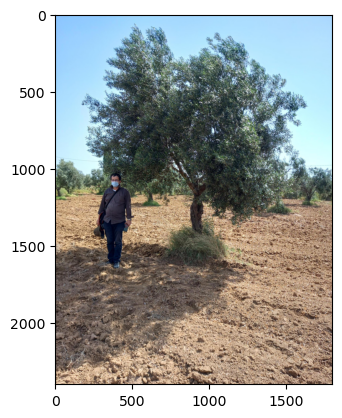

In [96]:
import matplotlib.pyplot as plt
im = plt.imread("/kaggle/input/pfa-tree-segmentation/im3.jpg")
plt.imshow(im)


In [97]:
%pip install pycocotools 

Note: you may need to restart the kernel to use updated packages.


In [98]:
import json 
import matplotlib.pyplot as plt 
import pycocotools.coco as coco 


In [99]:
# Pour les arbes : 
coco_dataset = coco.COCO("/kaggle/input/pfa-tree-segmentation/ann_tout_Tree.json")
#get image ids : 
tree_img_ids = coco_dataset.getImgIds()
# load images 
tree_images = coco_dataset.loadImgs(tree_img_ids) # donner les info sur les images 
# load anns
tree_ann_ids = coco_dataset.getAnnIds(imgIds=tree_img_ids) #donner les id des images 
tree_anns = coco_dataset.loadAnns(tree_ann_ids) # le fichier annotation complet 


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [100]:
# anns est de type liste de dictionnaires

tree_anns[18].keys() 

dict_keys(['id', 'iscrowd', 'image_id', 'category_id', 'segmentation', 'bbox', 'area'])

In [101]:
tree_anns[5]['iscrowd']  

0

In [102]:
for  i in range(15 , 32) :
    print('=========================================================================================')
    print(  "tree images __ : =>",tree_images[i] )
    print('tree bbox __ :=>' , tree_anns[i]['bbox'])
    print('tree area __ :=>' , tree_anns[i]['area'])
    print('===================================================================================')

tree images __ : => {'id': 16, 'width': 6144, 'height': 8160, 'file_name': 'im13.jpg'}
tree bbox __ :=> [500.5714285714287, 800, 3462.8571428571427, 4982.857142857143]
tree area __ :=> 13577469.387755102
tree images __ : => {'id': 17, 'width': 6144, 'height': 8160, 'file_name': 'im14.jpg'}
tree bbox __ :=> [3757.714285714286, 2034.2857142857142, 2251.428571428571, 4365.714285714286]
tree area __ :=> 7349877.551020405
tree images __ : => {'id': 18, 'width': 1800, 'height': 2400, 'file_name': 'im2.jpg'}
tree bbox __ :=> [389.07563025210084, 248.73949579831933, 1230.2521008403362, 1280.6722689075632]
tree area __ :=> 1077454.9819927972
tree images __ : => {'id': 19, 'width': 1800, 'height': 2400, 'file_name': 'im3.jpg'}
tree bbox __ :=> [147.05882352941177, 60.50420168067227, 1515.966386554622, 1552.9411764705883]
tree area __ :=> 1633907.2099428007
tree images __ : => {'id': 20, 'width': 1800, 'height': 2400, 'file_name': 'im4.jpg'}
tree bbox __ :=> [251.26050420168067, 245.3781512605042

In [103]:
#convertir toutes les annotations de segmentations en entier 
for j in range(32): 
    for i in range(len(tree_anns[j]['segmentation'][0])) : 
        tree_anns[j]['segmentation'][0][i]=int(tree_anns[j]['segmentation'][0][i])


In [104]:
tree_anns[0]['bbox']  # x, y , height , width 

[1136.1344537815125, 87.39495798319327, 2980.168067226891, 2691.7647058823527]

In [105]:
tree_anns[0]['area'] # la surface du ploygon qui forme l'arbre dans l'image  

5904719.892662946

## 2/- Il faut creer des chemeins des images a partir de l'annoatation

In [106]:
train_dir = '/kaggle/input/pfa-tree-segmentation/'
tree_img_path = []
for i in range(32): 
    tree_name = train_dir + tree_images[i]['file_name'] 
    tree_img_path.append(tree_name)
    
 

## 3/- CRRER LE MASK POUR LE TARGET : 

In [107]:
len(tree_anns[0]['segmentation'][0])  

52

(2048, 921)


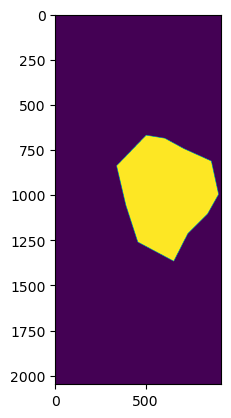

In [108]:
import json
import numpy as np
from PIL import Image 
from pycocotools import mask as coco_mask
import skimage.io as io 
tree_masks = []
tree_mask_img =[] 

for i in range(32):
    tree_img = io.imread(tree_img_path[i])
    for j in range(len(tree_anns[i]['segmentation'])):
        tree_height = tree_images[i]['height']
        tree_width = tree_images[i]['width']
        tree_rle = coco_mask.frPyObjects(tree_anns[i]['segmentation'] , tree_images[i]['height'], tree_images[i]['width'])
        tree_mask_ = coco_mask.decode(tree_rle)
        #print(mask_)
        #mask_=np.resize(mask_,(height , width))
        tree_masks.append(tree_mask_) 
        tree_mask_ = tree_mask_ > 0 # convert to boolean
        tree_mask_ = np.mean(tree_mask_, axis=-1) # convert to grayscale
       # print(mask_)
    Image.fromarray((tree_mask_*255).astype(np.uint8)).save("tree"+str(i)+'__mask.jpg')
    tree_mask_img.append("tree"+str(i)+"__mask.jpg")

plt.imshow(tree_mask_)
print(tree_mask_.shape) 

In [109]:
tree_mask_img[0]  

'tree0__mask.jpg'

(3120, 4160)


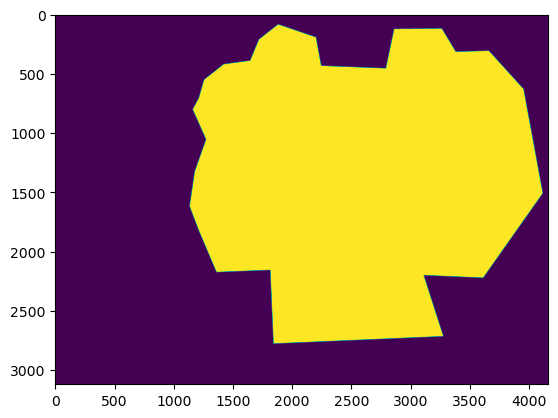

In [110]:
tree_im_=plt.imread(tree_mask_img[0])
print(tree_im_.shape) 
plt.imshow(tree_im_) 

## 4/- LE MODELE U_NET : 

In [111]:
import tensorflow as tf
import os
import random  
import numpy as np
import sys
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3



In [112]:
len(tree_img_path)  

32

In [113]:
from skimage import transform  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Resizing training images and masks
/kaggle/input/pfa-tree-segmentation/IMG_20210603_081229.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_082659.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_083105.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_083350.jpg
/kaggle/input/pfa-tree-segmentation/IMG_20210603_091003.jpg
/kaggle/input/pfa-tree-segmentation/O1.jpg
/kaggle/input/pfa-tree-segmentation/O_124141.jpg
/kaggle/input/pfa-tree-segmentation/O_124601.jpg
/kaggle/input/pfa-tree-segmentation/O_125721.jpg
/kaggle/input/pfa-tree-segmentation/O_130123.jpg
/kaggle/input/pfa-tree-segmentation/O_131625.jpg
/kaggle/input/pfa-tree-segmentation/im10.jpg
/kaggle/input/pfa-tree-segmentation/im11 (1).jpg
/kaggle/input/pfa-tree-segmentation/im11.jpg
/kaggle/input/pfa-tree-segmentation/im12.jpg
/kaggle/input/pfa-tree-segmentation/im13.jpg
/kaggle/input/pfa-tree-segmentation/im14.jpg
/kaggle/input/pfa-tree-segmentation/im2.jpg
/kaggle/input/pfa-tree-segmentation/im3.jpg
/kaggle/input/p

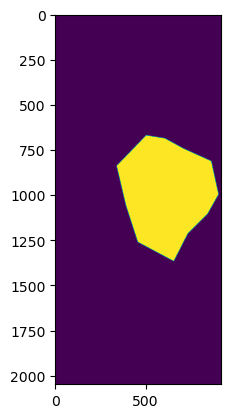

In [114]:


#train_ids = next(os.walk(TRAIN_DIR))
#test_ids = next(os.walk(TEST_DIR)) 

tree_X_train = np.zeros((32, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
tree_Y_train = np.zeros((32, IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)

print('Resizing training images and masks') 
for n  in range(32):   
    tree_path =tree_img_path[n] 
    print(tree_path)
    tree_img =Image.open(tree_path) #[:,:,:IMG_CHANNELS]  
    tree_img = tree_img.resize((IMG_HEIGHT, IMG_WIDTH))
    
    tree_X_train[n] = tree_img  #Fill empty X_train with values from img
    tree_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)  
    
for i in range(len(tree_masks)): 
    #print(mask_img[i])
    tree_mask_ = imread(tree_mask_img[i]) 
    print(tree_mask_.shape)
    plt.imshow(tree_mask_)
    tree_mask_=resize(tree_mask_,(IMG_HEIGHT, IMG_WIDTH))
    tree_mask_ = np.expand_dims(resize(tree_mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)
    tree_mask = np.maximum(tree_mask, tree_mask_)  
    tree_Y_train[i] = tree_mask_  

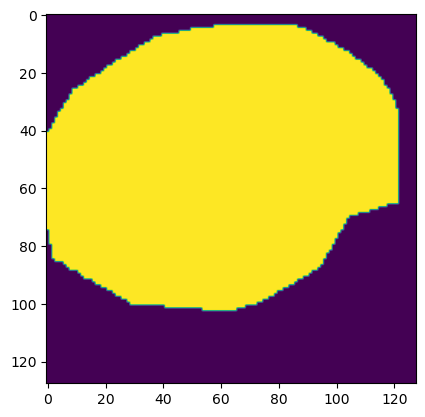

In [115]:
plt.imshow(tree_Y_train[11])  

In [116]:
#Build the model 
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path 
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

################################


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [117]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_tree.h5', verbose=1, save_best_only=True)

callbacks = [ 
        tf.keras.callbacks.EarlyStopping(patience=16, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(tree_X_train, tree_Y_train, validation_split=0.1, batch_size=100, epochs=600, callbacks=callbacks,
                    shuffle =True,
                    validation_freq=10,
                    max_queue_size=100,workers=1000 ,use_multiprocessing=True )


Epoch 1/600


2023-05-23 19:47:28.483738: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1/1 [==============================] - 8s 8s/step - loss: 0.9738 - accuracy: 0.4026
Epoch 2/600
1/1 [==============================] - 0s 121ms/step - loss: 0.7298 - accuracy: 0.4935
Epoch 3/600
1/1 [==============================] - 0s 116ms/step - loss: 0.6743 - accuracy: 0.5809
Epoch 4/600
1/1 [==============================] - 0s 80ms/step - loss: 0.6683 - accuracy: 0.6072
Epoch 5/600
1/1 [==============================] - 0s 77ms/step - loss: 0.6668 - accuracy: 0.6138
Epoch 6/600
1/1 [==============================] - 0s 78ms/step - loss: 0.6600 - accuracy: 0.6164
Epoch 7/600
1/1 [==============================] - 0s 77ms/step - loss: 0.6486 - accuracy: 0.6250
Epoch 8/600
1/1 [==============================] - 0s 79ms/step - loss: 0.6456 - accuracy: 0.6406
Epoch 9/600
1/1 [==============================] - 0s 79ms/step - loss: 0.6319 - accuracy: 0.6405
Epoch 10/600
1/1 [==============================] - 1s 682ms/step - loss: 0.6277 - accuracy: 0.6471 - val_loss: 0.4883 - val_accur

1/1 [==============================] - 0s 26ms/step


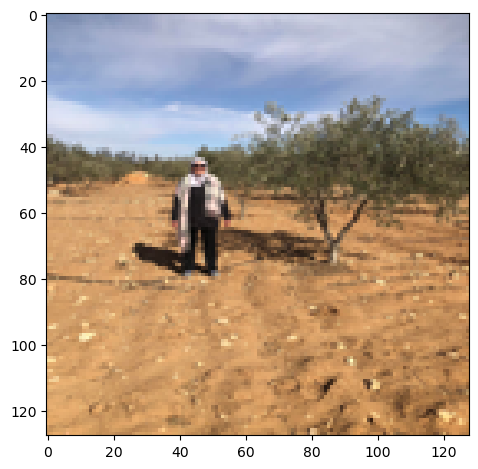

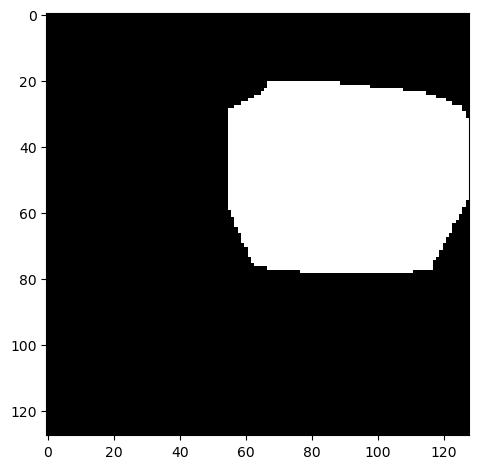

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


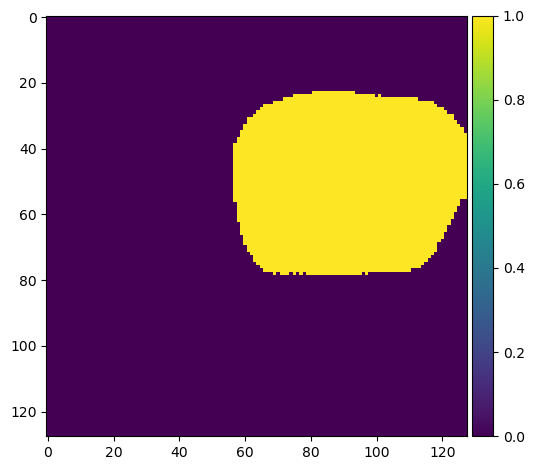

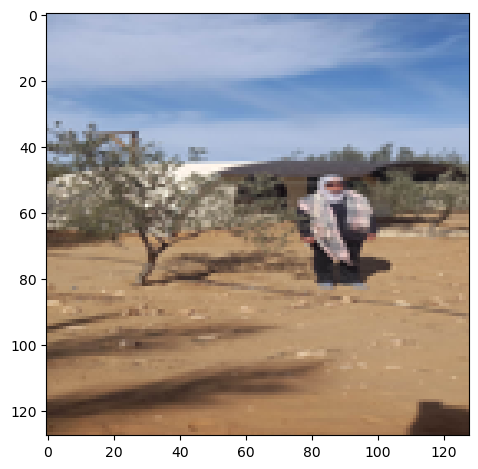

<Figure size 1800x1800 with 0 Axes>

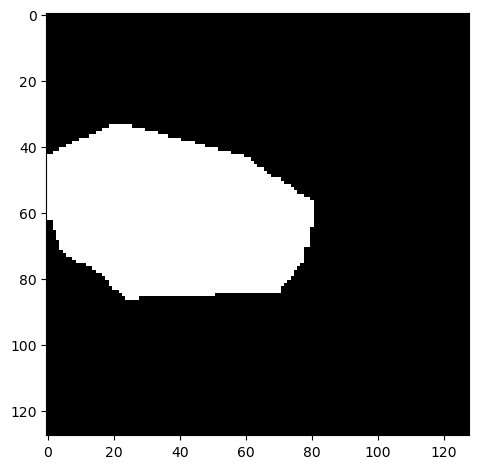

In [118]:

# Make predictions on the training, validation, and test sets
tree_preds_train = model.predict(tree_X_train[:int(tree_X_train.shape[0]*0.9)], verbose=1)
tree_preds_val = model.predict(tree_X_train[int(tree_X_train.shape[0]*0.9):], verbose=1)
#tree_preds_test = model.predict(tree_X_test, verbose=1)

# Threshold the predicted probabilities to get binary predictions
tree_preds_train_t = (tree_preds_train > 0.5).astype(np.uint8)
tree_preds_val_t = (tree_preds_val > 0.5).astype(np.uint8)
#tree_preds_test_t = (tree_preds_test > 0.5).astype(np.uint8)

# Perform a sanity check on some random training samples
# Display the original image
tree_ix = random.randint(0, len(tree_preds_train_t))
imshow(tree_X_train[tree_ix])
plt.show()
# Display the ground truth mask
imshow(np.squeeze(tree_Y_train[tree_ix]))
plt.show()
# Display the predicted mask
imshow(np.squeeze(tree_preds_train_t[tree_ix]))
plt.show()

# Perform a sanity check on some random validation samples
# Display the original image
tree_ix = random.randint(0, len(tree_X_train[int(tree_X_train.shape[0]*0.9):])-1)
imshow(tree_X_train[int(tree_X_train.shape[0]*0.9):][tree_ix])
plt.figure(figsize=(18,18))
plt.show()
# Display the ground truth mask
imshow(np.squeeze(tree_Y_train[int(tree_Y_train.shape[0]*0.9):][tree_ix]))
plt.show()


#The code above is using the trained `model` to predict segmentation masks for the training, 
#validation and test sets. The predicted masks are then thresholded to generate binary predictions.

#Next, the code performs a sanity check on some random samples from the training and validation sets
#to visually inspect predictions, ground truth masks, and original images.

#Note that this is just an example and the exact details of the code will depend on the specific 
#machine learning library or framework you are working with.

In [119]:
model.save("model_for_tree.h5") 

In [120]:
results.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

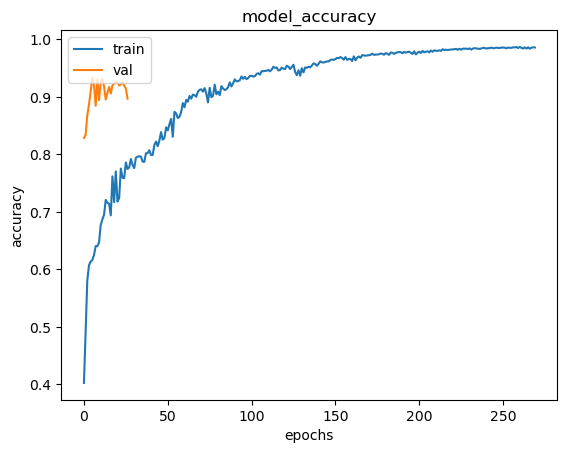

In [121]:
import matplotlib.pyplot as plt 
plt.plot(results.history['accuracy']) 
plt.plot(results.history['val_accuracy']) 
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs') 
plt.legend(['train','val'] ,loc="upper left")
plt.show()

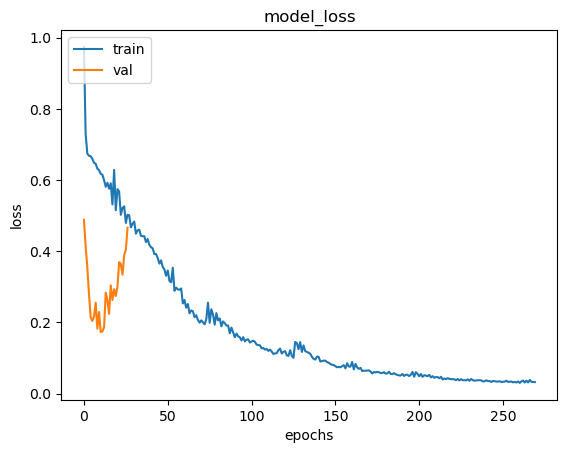

In [122]:
import matplotlib.pyplot as plt 
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs') 
plt.legend(['train','val'] ,loc="upper left")
plt.show()

In [123]:
tree_mask_img[0]
tree_path[0]

'/'

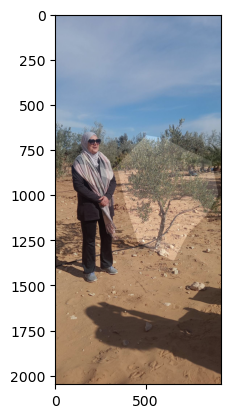

In [124]:
from PIL import Image
img_res = []
for i in range(32):
    img1=Image.open(tree_mask_img[i])
    img2 = Image.open(tree_img_path[i])
    img1 = img1.convert("RGB")
    img2 = img2.convert("RGB")
    # Get the dimensions of the images
    width1, height1 = img1.size 
    width2, height2 = img2.size
    # If the two images have different dimensions, resize the larger image to match the smaller one
    if width1 != width2 or height1 != height2:
        if width1 > width2 or height1 > height2:
            img1 = img1.resize((width2, height2))
        else:
            img2 = img2.resize((width1, height1))
    img3 = Image.blend(img2, img1, 0.15)
    
    
    img3.save(str(i)+"__result.jpg")
    img_res.append(str(i)+"__result.jpg")
    plt.imshow(img3)

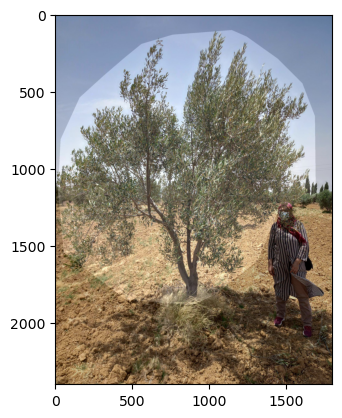

In [125]:
im__=plt.imread(img_res[11])    #.astype(int)
plt.imshow(im__) 

## Partie II : detection de la taille de l'arbre 

In [126]:
ds= pd.read_csv('/kaggle/input/pfa-tree-segmentation/pfa__info__images - Sheet2.csv')

In [127]:
ds.head(5)

,image name,height image,width image,height mask,width mask,area mask,person height,person width,person area,person real height
0,IMG_20210603_081229.jpg,3120,4160,2980.168067,2691.764706,5904719.893,441.344538,1162.352941,344926.6012,1.68
1,IMG_20210603_082659.jpg,4160,3120,2742.745098,2703.417367,5469624.951,355.406162,1206.050420,284129.0869,1.67
2,IMG_20210603_083105.jpg,3120,4160,2779.159664,2272.268908,4976421.665,318.991597,996.302521,223427.0461,1.70
3,IMG_20210603_083350.jpg,3120,4160,3028.235294,2302.857143,4553865.574,402.016807,1275.966387,370332.0952,1.70
4,IMG_20210603_091003.jpg,3120,4160,2551.932773,2416.470588,4362775.397,515.630252,1341.512605,470235.5483,1.80


In [128]:
ds.info 

<bound method DataFrame.info of                  image name  height image  width image  height mask  \
0   IMG_20210603_081229.jpg          3120         4160  2980.168067   
1   IMG_20210603_082659.jpg          4160         3120  2742.745098   
2   IMG_20210603_083105.jpg          3120         4160  2779.159664   
3   IMG_20210603_083350.jpg          3120         4160  3028.235294   
4   IMG_20210603_091003.jpg          3120         4160  2551.932773   
5                    O1.jpg          8160         6144  5908.571429   
6              O_124141.jpg          8160         6144  5357.714286   
7              O_124601.jpg          8160         6144  6000.000000   
8              O_125721.jpg          8160         6144  5529.142857   
9              O_130123.jpg          8160         6144  5017.142857   
10             O_131625.jpg          8160         6144  5291.428571   
11                 im10.jpg          2400         1800  1670.588235   
12             im11 (1).jpg          2496    

In [129]:
ds.isna().value_counts()

image name  height image  width image  height mask  width mask  area mask   person height  person width  person area   person real height 
False       False         False        False        False       False       False          False         False         False                  32
dtype: int64

In [130]:
import seaborn as sns

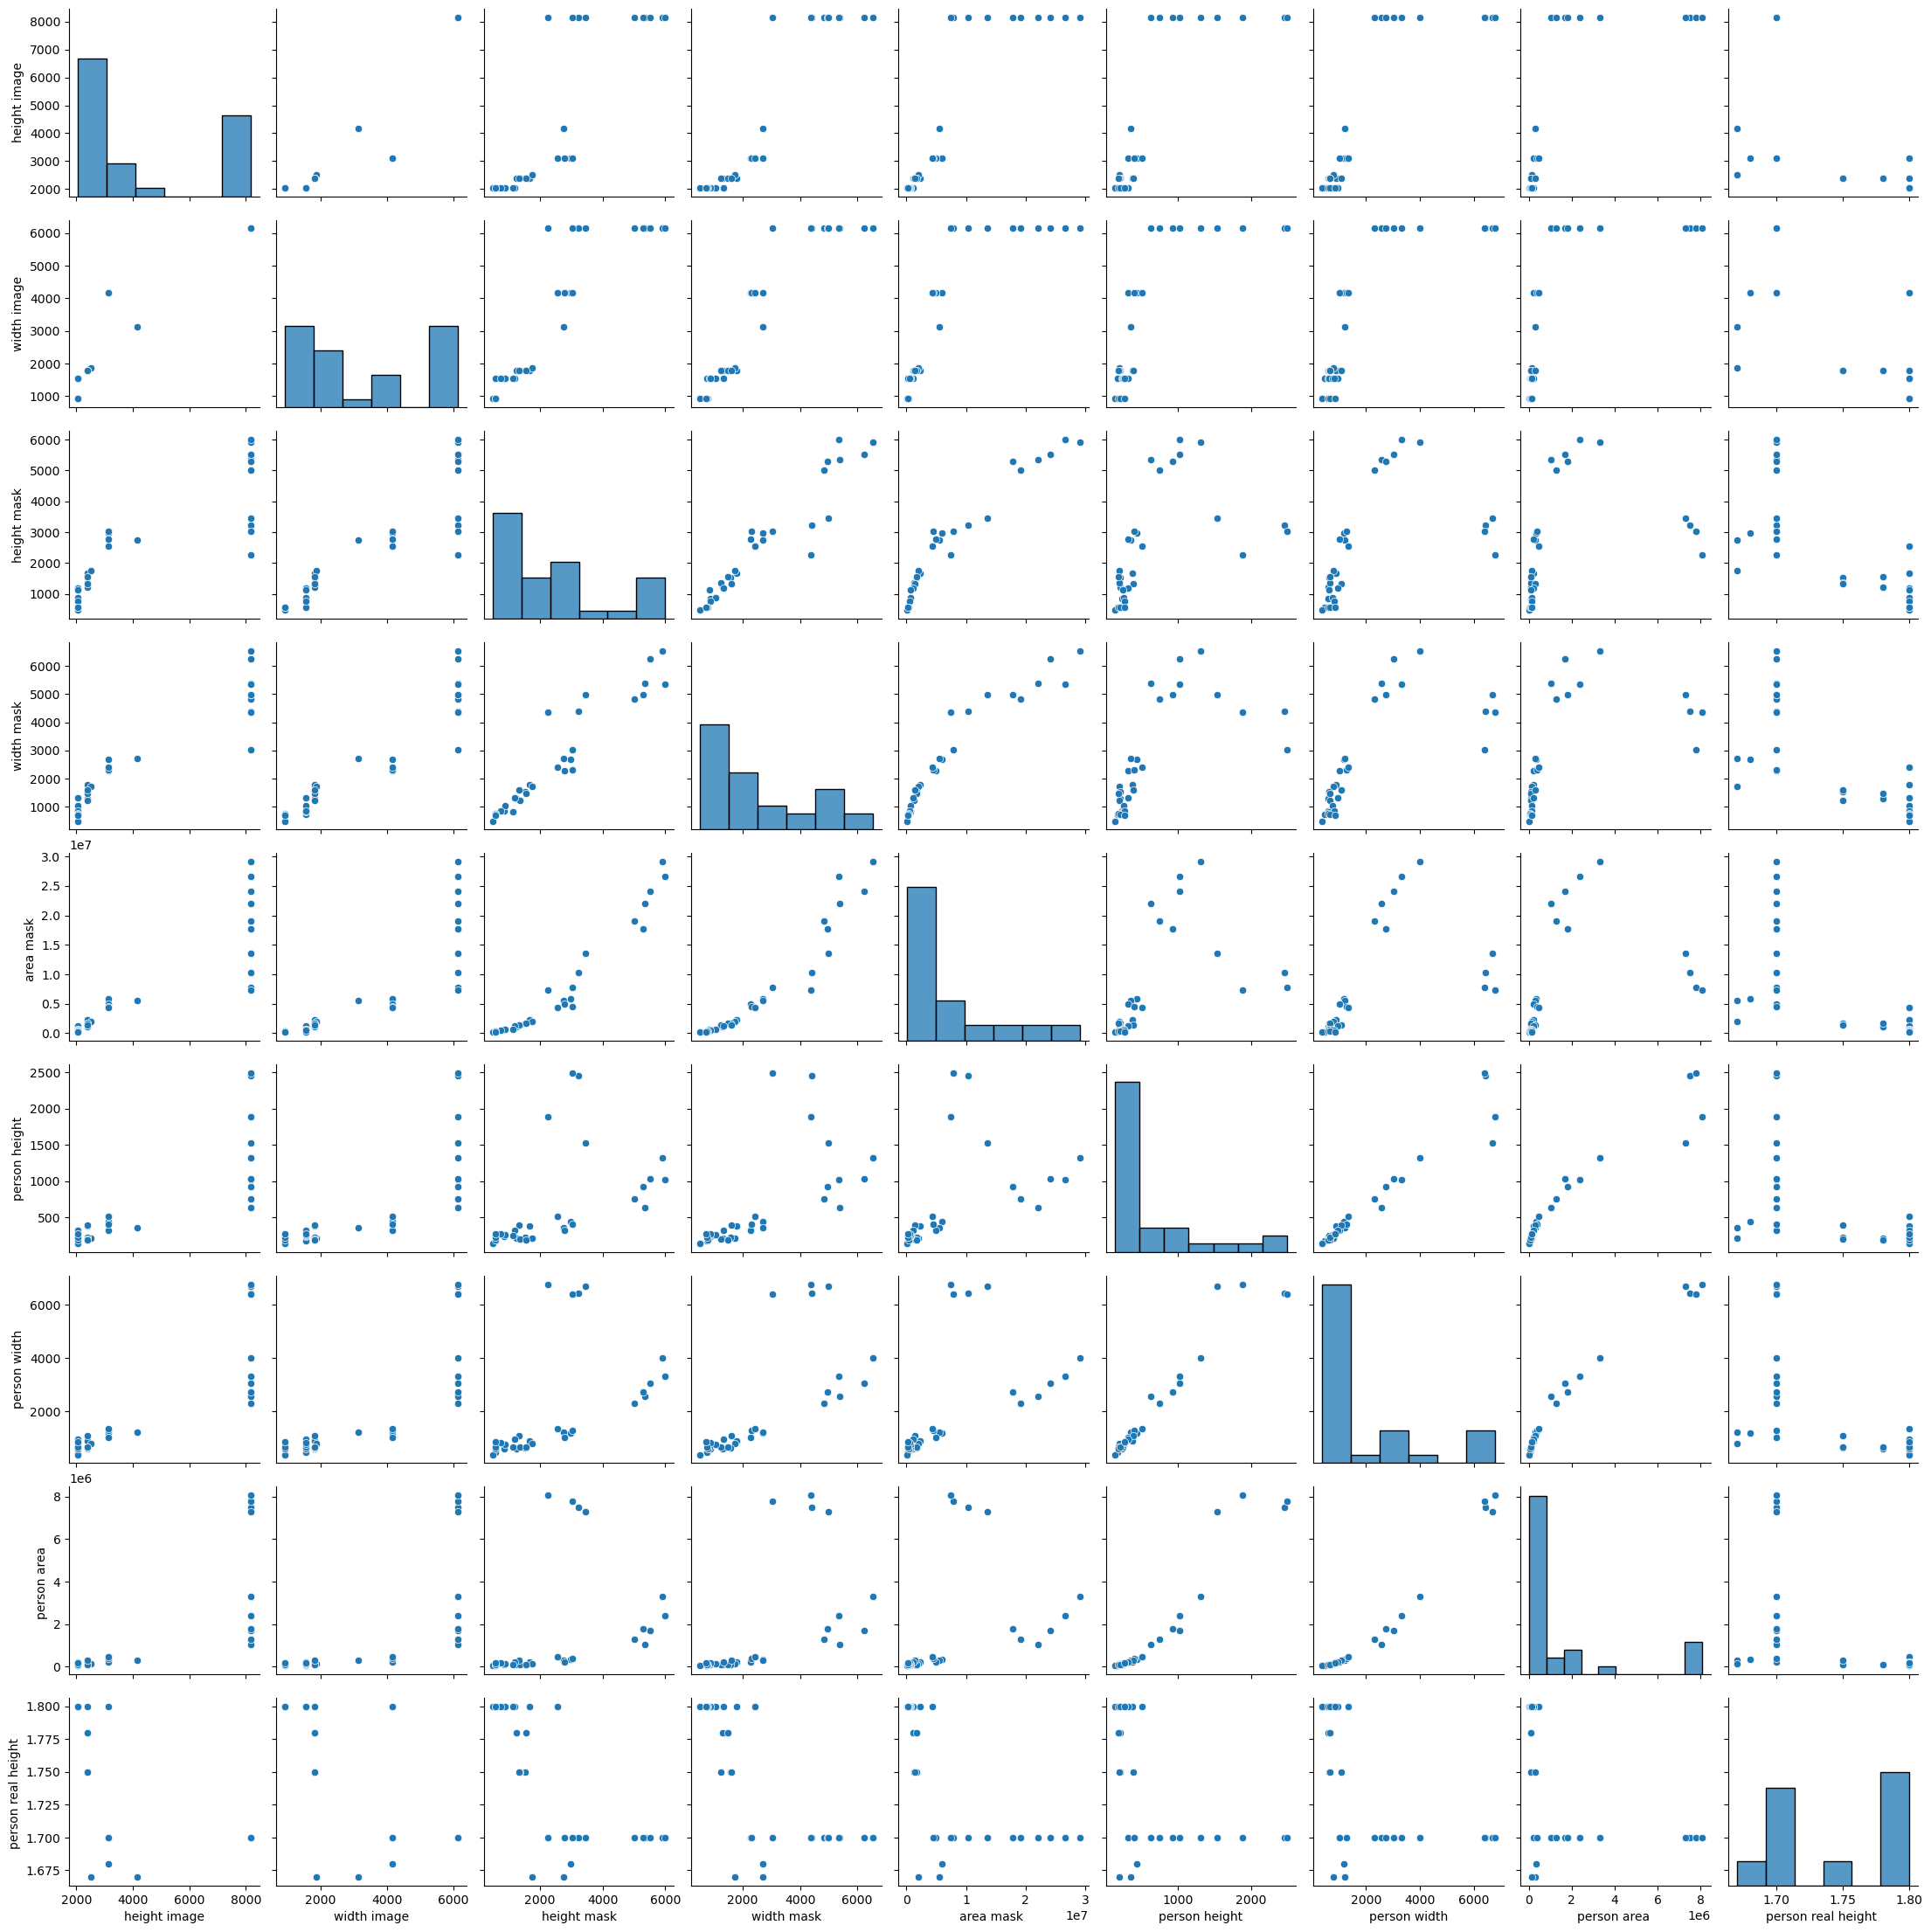

In [131]:
sns.pairplot(ds)

In [132]:
ds.corr() 

,height image,width image,height mask,width mask,area mask,person height,person width,person area,person real height
height image,1.000000,0.949110,0.864160,0.941238,0.873585,0.819168,0.852211,0.751006,-0.700379
width image,0.949110,1.000000,0.899318,0.937672,0.846602,0.778548,0.805373,0.696745,-0.769979
height mask,0.864160,0.899318,1.000000,0.950751,0.962951,0.515720,0.538802,0.381004,-0.738907
width mask,0.941238,0.937672,0.950751,1.000000,0.952004,0.664299,0.715775,0.576732,-0.734719
area mask,0.873585,0.846602,0.962951,0.952004,1.000000,0.517051,0.555552,0.400351,-0.628584
person height,0.819168,0.778548,0.515720,0.664299,0.517051,1.000000,0.965436,0.958636,-0.527653
person width,0.852211,0.805373,0.538802,0.715775,0.555552,0.965436,1.000000,0.981482,-0.562805
person area,0.751006,0.696745,0.381004,0.576732,0.400351,0.958636,0.981482,1.000000,-0.472478
person real height,-0.700379,-0.769979,-0.738907,-0.734719,-0.628584,-0.527653,-0.562805,-0.472478,1.000000


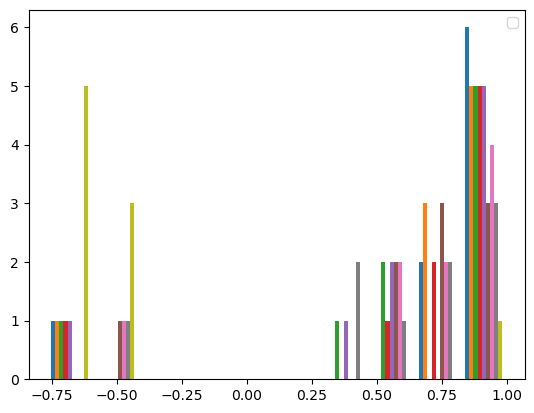

In [133]:
plt.hist(ds.corr()) 
plt.legend()

In [134]:
coco_person ="/kaggle/input/pfa-tree-segmentation/Person_annns___precis.json"

# Pour les personnes : 
coco_person = coco.COCO(coco_person)
#get image ids : 
person_img_ids = coco_person.getImgIds() 
# load images 
person_images = coco_person.loadImgs(person_img_ids) # donner les info sur les images 
# load anns
person_ann_ids = coco_person.getAnnIds(imgIds=person_img_ids) #donner les id des images 
person_anns = coco_person.loadAnns(person_ann_ids) # le fichier annotation complet 


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [135]:
# anns est de type liste de dictionnaires
 
person_anns[18].keys() 

dict_keys(['id', 'iscrowd', 'image_id', 'category_id', 'segmentation', 'bbox', 'area'])

In [136]:
for  i in range(32) :
    print('=========================================================================================')
    print(  "person images __ : =>",person_images[i] )
    print('person bbox __ :=>' , person_anns[i]['bbox']) 
    print('person area __ :=>' , person_anns[i]['area'])
    print('===========================================================================================')

person images __ : => {'id': 1, 'width': 4160, 'height': 3120, 'file_name': 'IMG_20210603_081229.jpg'}
person bbox __ :=> [830.2521008403361, 1643.0252100840335, 441.34453781512605, 1162.3529411764703]
person area __ :=> 344926.6012287267
person images __ : => {'id': 2, 'width': 3120, 'height': 4160, 'file_name': 'IMG_20210603_082659.jpg'}
person bbox __ :=> [2200.896358543417, 1800.3361344537814, 355.4061624649862, 1206.0504201680671]
person area __ :=> 284129.0869288882
person images __ : => {'id': 3, 'width': 4160, 'height': 3120, 'file_name': 'IMG_20210603_083105.jpg'}
person bbox __ :=> [2586.890756302521, 1538.1512605042014, 318.9915966386552, 996.3025210084036]
person area __ :=> 223427.04611256253
person images __ : => {'id': 4, 'width': 4160, 'height': 3120, 'file_name': 'IMG_20210603_083350.jpg'}
person bbox __ :=> [2556.302521008403, 1468.2352941176468, 402.0168067226891, 1275.9663865546217]
person area __ :=> 370332.0951910176
person images __ : => {'id': 5, 'width': 4160, 

<AxesSubplot:>

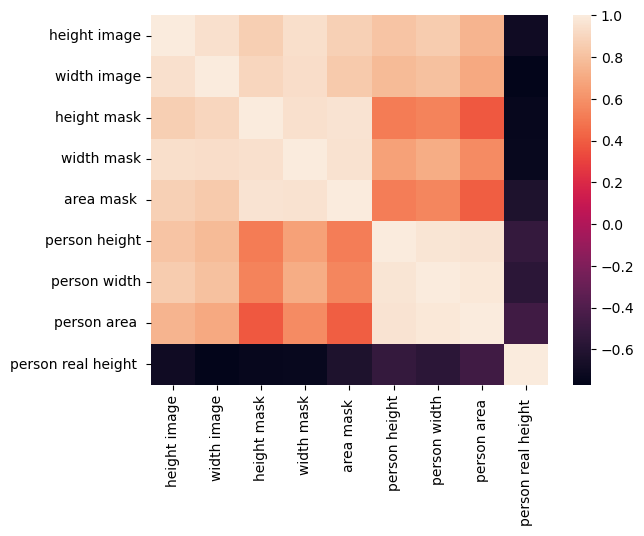

In [137]:
sns.heatmap(ds.corr())  

In [138]:
ds.columns


Index(['image name', 'height image', 'width image', 'height mask',
       'width mask', 'area mask ', 'person height', 'person width',
       'person area ', 'person real height '],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from 

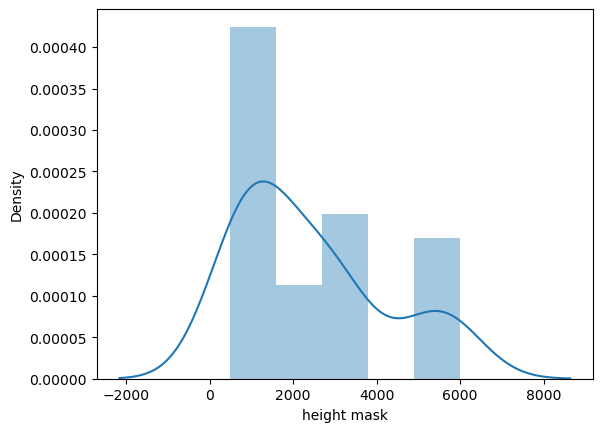

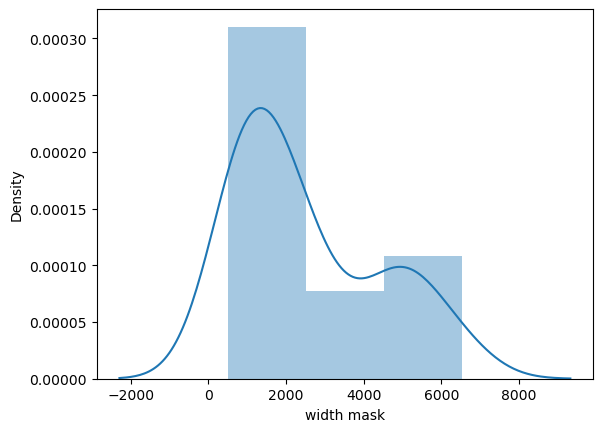

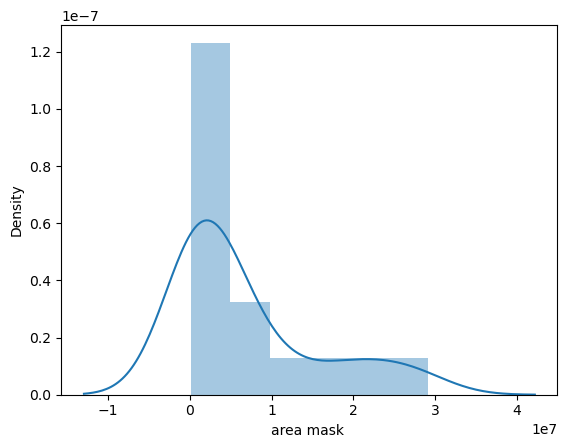

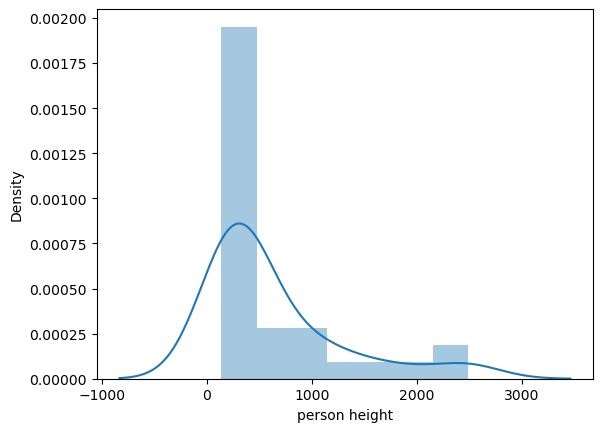

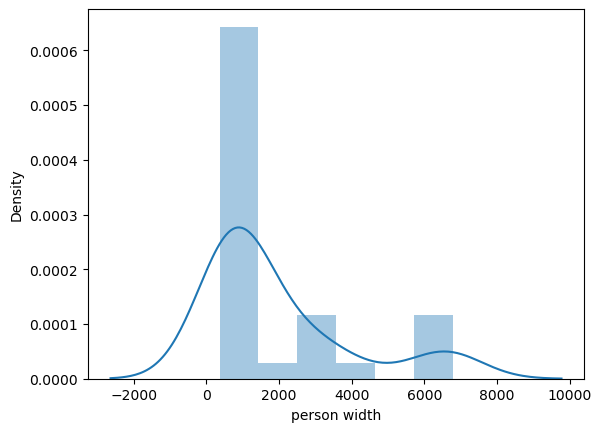

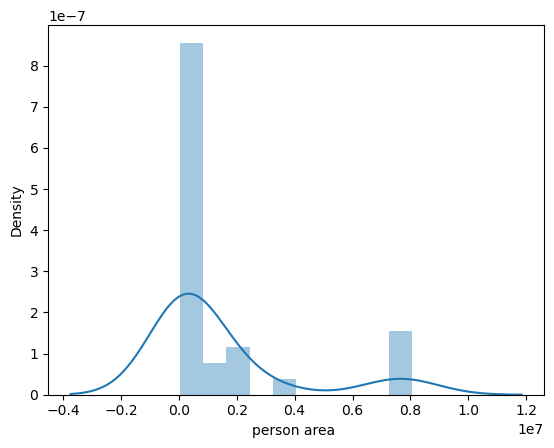

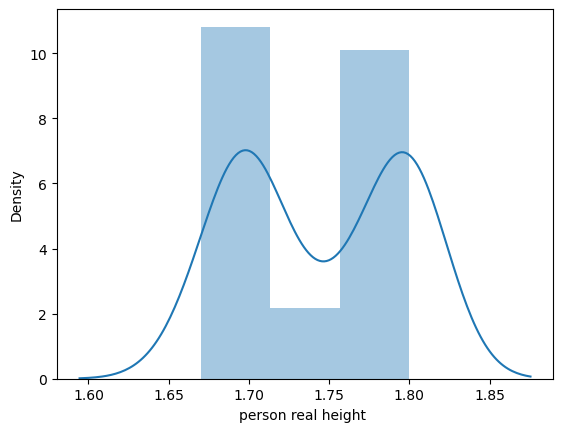

In [139]:
for col in ds.select_dtypes('float'):
    plt.figure()
    sns.distplot(ds[col])

le target est la surface de l'arbre divisé par celle de personne puis multipliée par la taille reelle de la personne 

(arbre_area * personne taille reelle / personne area) 

De même pour la hauteur et la largeur 

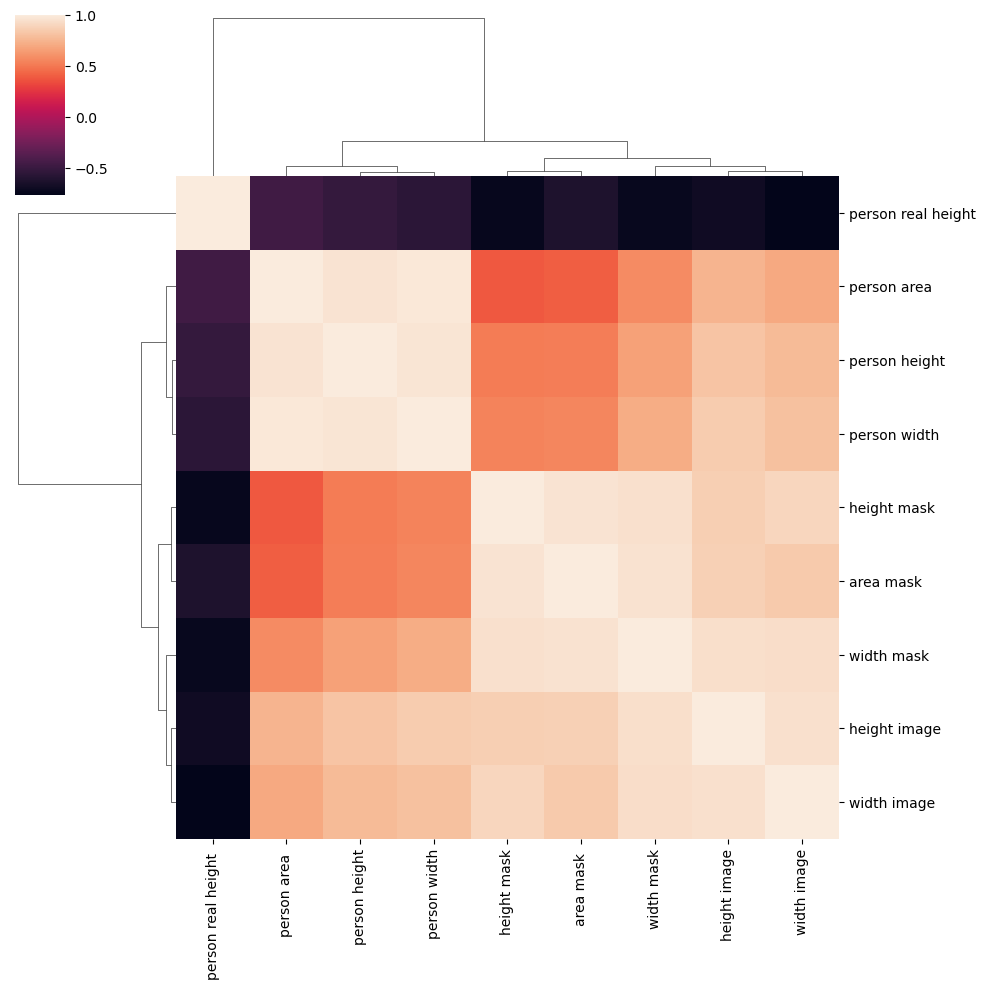

In [140]:
sns.clustermap(ds.corr())

In [141]:
ds.insert(9, column = "Target_ ", value = 0.00)  

In [142]:
ds.shape 

(32, 11)

In [143]:
ds.head() 

,image name,height image,width image,height mask,width mask,area mask,person height,person width,person area,Target_,person real height
0,IMG_20210603_081229.jpg,3120,4160,2980.168067,2691.764706,5904719.893,441.344538,1162.352941,344926.6012,0.0,1.68
1,IMG_20210603_082659.jpg,4160,3120,2742.745098,2703.417367,5469624.951,355.406162,1206.050420,284129.0869,0.0,1.67
2,IMG_20210603_083105.jpg,3120,4160,2779.159664,2272.268908,4976421.665,318.991597,996.302521,223427.0461,0.0,1.70
3,IMG_20210603_083350.jpg,3120,4160,3028.235294,2302.857143,4553865.574,402.016807,1275.966387,370332.0952,0.0,1.70
4,IMG_20210603_091003.jpg,3120,4160,2551.932773,2416.470588,4362775.397,515.630252,1341.512605,470235.5483,0.0,1.80


In [144]:
ds.columns

Index(['image name', 'height image', 'width image', 'height mask',
       'width mask', 'area mask ', 'person height', 'person width',
       'person area ', 'Target_ ', 'person real height '],
      dtype='object')

In [145]:
ds['person area '][0]

344926.6012

In [146]:
for i in range(ds.shape[0]):
    ds['Target_ '][i]= (ds['height mask'][i]/ds['person width'][i])*ds['person real height '][i]   
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
ds.head() 

,image name,height image,width image,height mask,width mask,area mask,person height,person width,person area,Target_,person real height
0,IMG_20210603_081229.jpg,3120,4160,2980.168067,2691.764706,5904719.893,441.344538,1162.352941,344926.6012,4.307368,1.68
1,IMG_20210603_082659.jpg,4160,3120,2742.745098,2703.417367,5469624.951,355.406162,1206.050420,284129.0869,3.797838,1.67
2,IMG_20210603_083105.jpg,3120,4160,2779.159664,2272.268908,4976421.665,318.991597,996.302521,223427.0461,4.742105,1.70
3,IMG_20210603_083350.jpg,3120,4160,3028.235294,2302.857143,4553865.574,402.016807,1275.966387,370332.0952,4.034589,1.70
4,IMG_20210603_091003.jpg,3120,4160,2551.932773,2416.470588,4362775.397,515.630252,1341.512605,470235.5483,3.424104,1.80


/kaggle/input/pfa-tree-segmentation/IMG_20210603_081229.jpg


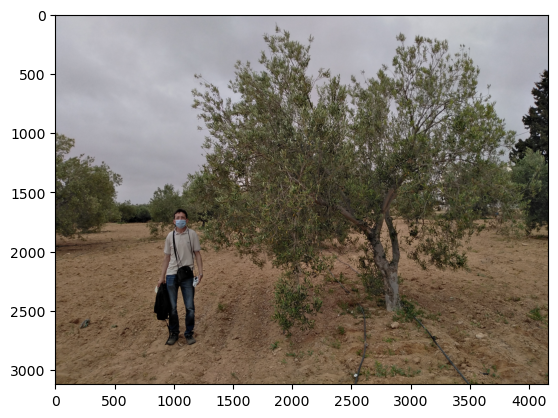

In [148]:
img_dir ="/kaggle/input/pfa-tree-segmentation/"
name = img_dir + ds['image name'][0] 
print(name)
im = plt.imread(name)
plt.imshow(im)

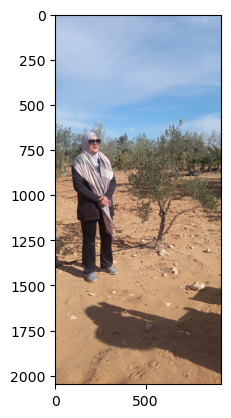

In [149]:
im=plt.imread("/kaggle/input/pfa-tree-segmentation/mr5.jpg")
plt.imshow(im)

## Relation target/variables :

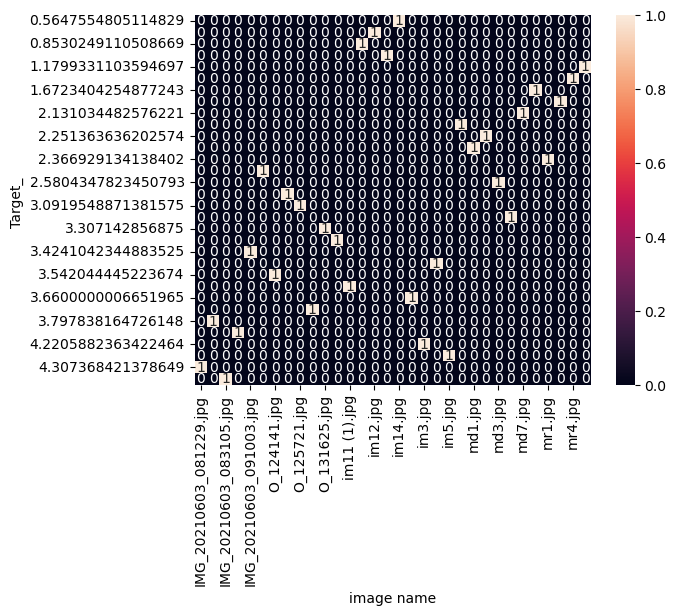

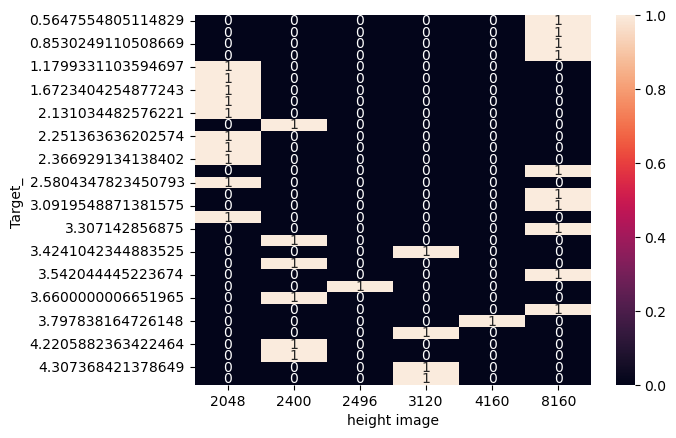

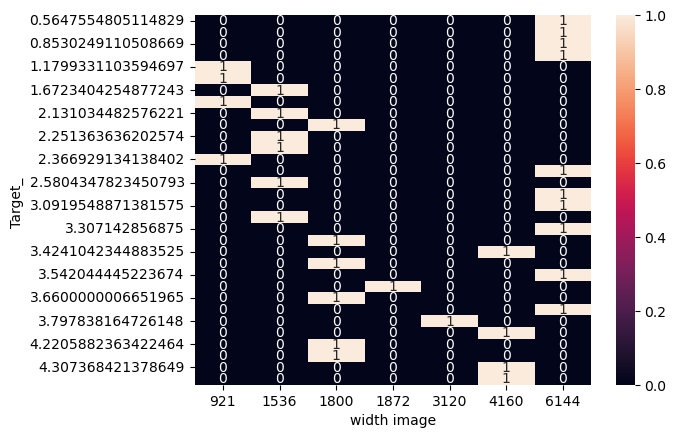

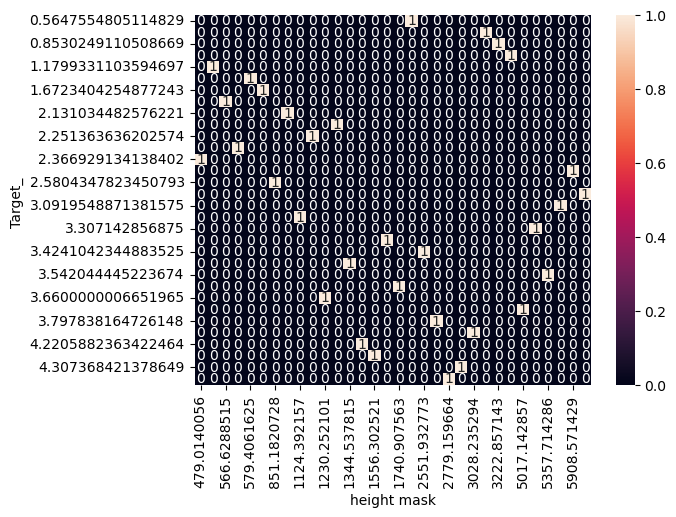

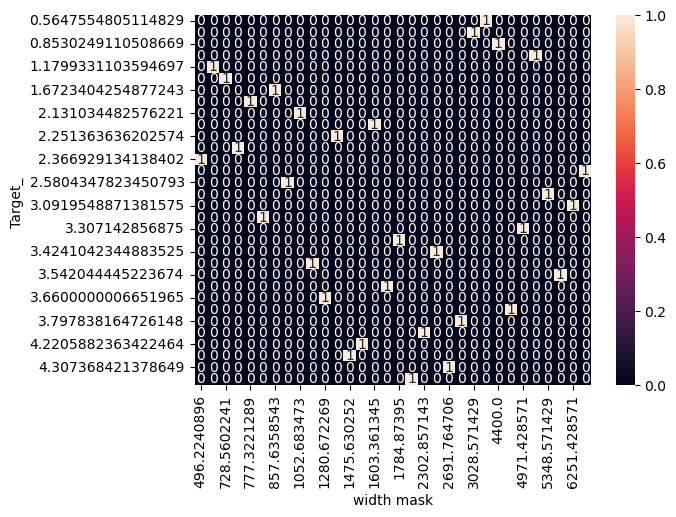

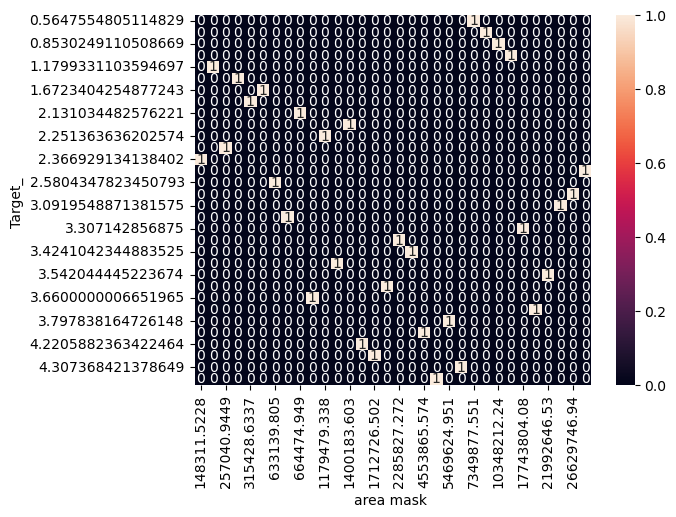

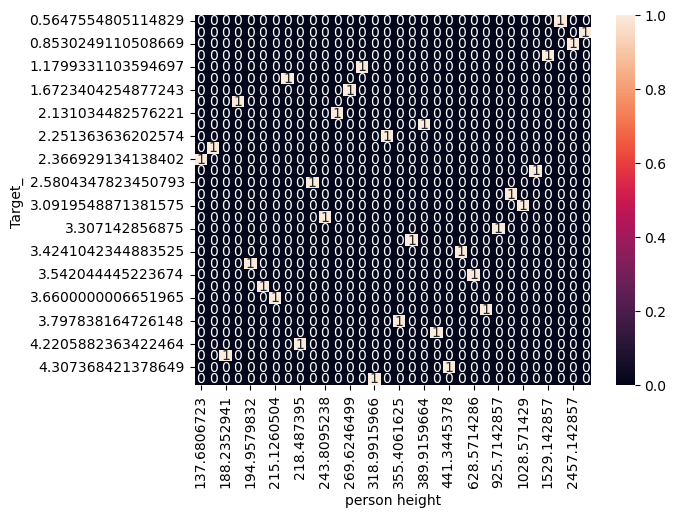

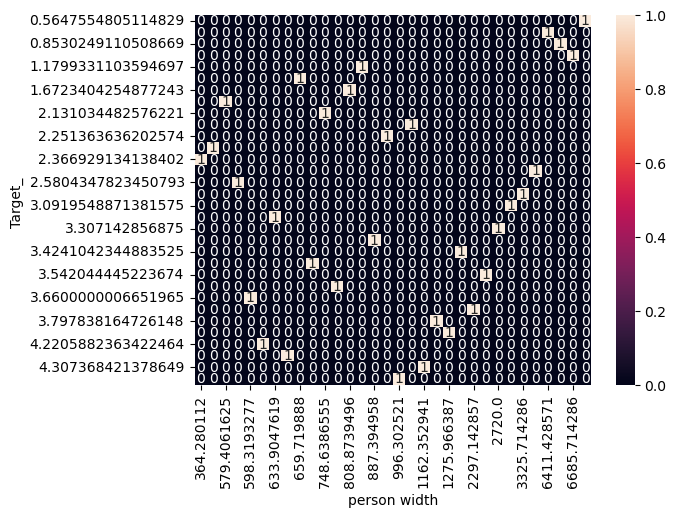

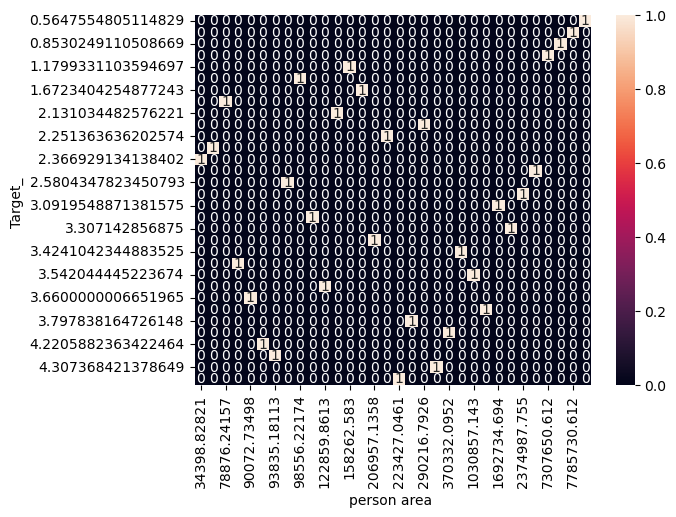

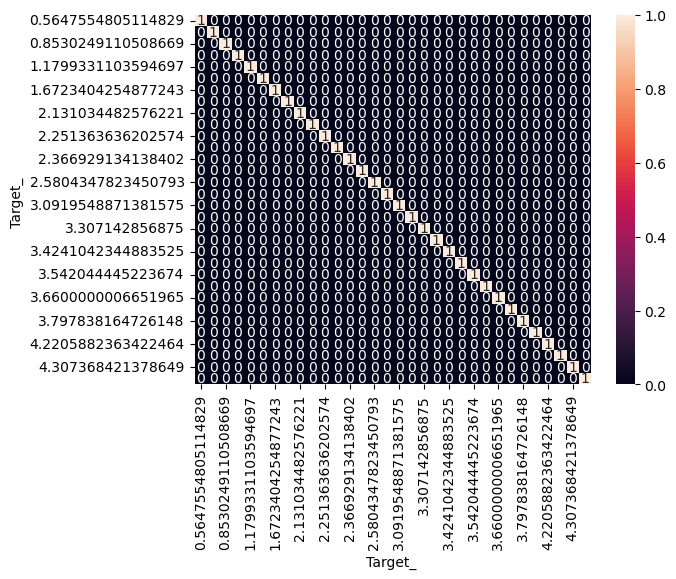

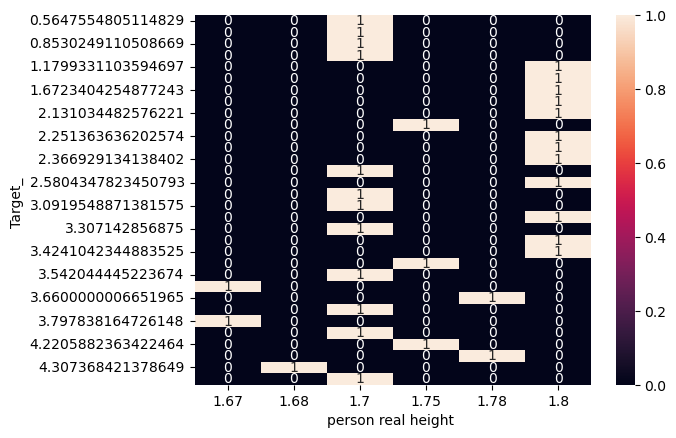

In [150]:
for col in ds.columns:
    plt.figure()
    sns.heatmap(pd.crosstab(ds['Target_ '], ds[col]), annot=True, fmt='d')

In [151]:
ds_ = ds.copy()
ds=ds.drop('image name' ,axis=1)

In [152]:
ds

,height image,width image,height mask,width mask,area mask,person height,person width,person area,Target_,person real height
0,3120,4160,2980.168067,2691.764706,5.904720e+06,441.344538,1162.352941,3.449266e+05,4.307368,1.68
1,4160,3120,2742.745098,2703.417367,5.469625e+06,355.406162,1206.050420,2.841291e+05,3.797838,1.67
2,3120,4160,2779.159664,2272.268908,4.976422e+06,318.991597,996.302521,2.234270e+05,4.742105,1.70
3,3120,4160,3028.235294,2302.857143,4.553866e+06,402.016807,1275.966387,3.703321e+05,4.034589,1.70
4,3120,4160,2551.932773,2416.470588,4.362775e+06,515.630252,1341.512605,4.702355e+05,3.424104,1.80
5,8160,6144,5908.571429,6537.142857,2.908637e+07,1314.285714,3988.571429,3.303445e+06,2.518338,1.70
6,8160,6144,5357.714286,5394.285714,2.199265e+07,628.571429,2571.428571,1.030857e+06,3.542044,1.70
7,8160,6144,6000.000000,5348.571429,2.662975e+07,1017.142857,3325.714286,2.374988e+06,3.067010,1.70
8,8160,6144,5529.142857,6251.428571,2.407498e+07,1028.571429,3040.000000,1.692735e+06,3.091955,1.70
9,8160,6144,5017.142857,4822.857143,1.910622e+07,754.285714,2297.142857,1.268506e+06,3.712935,1.70


In [153]:
from sklearn.model_selection import train_test_split 

In [154]:
trainset, testset = train_test_split(ds, test_size=0.2, random_state=0)

In [155]:
def imputation(ds):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    ds = ds.dropna(axis=0)
    return  ds

In [156]:
def preprocessing(ds):
    
    ds = imputation(ds)
    
    X = ds.drop('Target_ ', axis=1)
    y = ds['Target_ ']
    
    #print(y.value_counts())
    
    return X, y

In [157]:
X_train, y_train = preprocessing(trainset)

In [158]:
X_test, y_test = preprocessing(testset)

In [159]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve 

## Modelisation

Là on est dans le cas de prediction de taille pas dans celui de classification donc il faut avoir d'autre model 

In [160]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LinearRegression  

In [161]:
poly_reg = PolynomialFeatures(degree = 6)  

In [162]:
X_polynomial = poly_reg.fit_transform(X_train)   

In [163]:
lreg = LinearRegression()  
res = lreg.fit(X_train, y_train)  

In [164]:
res.score(X_train ,y_train)

0.9598657490947007

In [165]:
y_pred =lreg.predict(X_test).reshape(7,1)

In [166]:
print(type(y_test))
y_test=y_test.values

<class 'pandas.core.series.Series'>


In [167]:
y=y_test.reshape(7,1)

In [168]:
y

array([[3.38863636],
       [2.28152866],
       [3.30714286],
       [4.74210526],
       [0.56475548],
       [0.8030303 ],
       [2.36692913]])

In [169]:
y_pred

array([[3.71135038],
       [2.29828222],
       [4.96973273],
       [4.19843652],
       [0.62149936],
       [0.48058688],
       [2.47595082]])

## Ridge CV 

In [170]:
from sklearn.linear_model import RidgeCV

In [171]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9477368907993544

## Ridge

In [172]:
from sklearn.linear_model import Ridge

In [173]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()
clf.score(X_train, y_train)

0.9487156651411087

## Huber Regressor 

In [174]:
from sklearn.linear_model import HuberRegressor

0.5033439690189979
0.5058144470732504
0.7159317569276609
0.5064502729746991


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


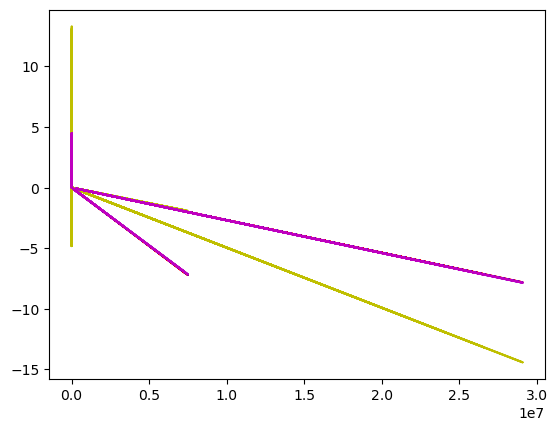

In [175]:
epsilon_values = [1*2, 1.5*2, 1.75*2, 1.9*2]
colors = ["r-", "b-", "y-", "m-"]

for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X_train, y_train)
    print(huber.score(X_train, y_train))
    coef_ = huber.coef_ * X_train + huber.intercept_
    plt.plot(X_train, coef_, colors[k], label="huber loss, %s" % epsilon)


## Conclusion  

le meillleur model est linear regression 